# Using Verlet Equations to Model Solar System

## Abstract:

For this project I will be showing how the velocity verlet equation can be used to model the orbits of planets in our solar system. I will show that for significantly small step sizes the end positions for planets calculated with the verlet equations will be almost the same, but will change exponentially with larger increases in step size.

## Introduction:

Our solar system is held together by the gravitational force between the planets and the Sun. This force creates the centripital acceleration needed to keep the planets in orbit around the Sun. The planets also have a velocity perpendicular to the centripital acceleration that keeps them from being pulled into the Sun. We can represent the equations of motion for the planets using the Velocity Verlet method and Newton's Law of Gravity to approximate their orbits over time.

## Method:

### Verlet Method
The Verlet method is a way to approximate the integral of a function over a given integral using stepping. According to the kinematic equations the new position of an object, $p$, after a given time interval, $dt$, is has the following form
$pos= pos_0 + v*dt+ 1/2*a*dt^2$. The $p_0$ term is the obects initial position, $v$ is the velocity, and $a$ is the acceleration. The new velocity is found using the equation $v=v_0+a*dt$ where $v_0$ is the initial velocity. In the verlet method we set a small step size and update the position and velocity for each step. In this method $pos$ and $v$ are treated as $dpos$ and $dv$. As we go we update the position and velocity by summing in the recieved $dpos$ and $dv$. The intial position and velocity are the position and velocity we recieved from the last step of the cycle. 

### Verlet Method for Changing Acceleration
For the case of planetary orbits where the position of the planet affects the acceleration of the planet we first update the position with our old velocity, then find the new acceleration using Newton's Law of Gravity, and then we find the velocity o the position by averaging over the accelerations $v=v_0+1/2(a_new+a_old)*dt$.

### Gravitational Acceleration
To find the new acceleration we start with Newton's Law of Gravity, $F_G=(G*M_1*M_2)/(R^2)$ where $F_G$ is the gravitational force, $G$ is the gravitational constant, $M_1$ and $M_2$ are the masses, and $R$ is the distance between the two masses. By applying Newton's Second Law $F=m*a$ we can find the gravitational acceleration for $M_1$. $F=M_1*a = (G*M_1*M_2)/(R^2) --> a = (G*M_2)/(R^2)$ where the acceleration vector points from $M_1$ to $M_2$. For a multibody system we must consider the gravitational acceleration caused by all objects on each other. We can do this by adding all the accelerations together.

### Values of planets

All planets begin on the x-axis at the given average radius from the sun. Their initial velocity is in the positive y direction, perpendicular to the x-axis. All values are from https://ssd.jpl.nasa.gov/?planet_phys_par and https://nssdc.gsfc.nasa.gov/planetary/factsheet/

|Planet   |Mass(10^24 kg)|Average Radius(AU) |Velocity(AU/year)|
|---------|--------------|-------------------|-----------------|
|Sun      |1.989x10^6    |0                  |0                |
|Earth    |5.97          |1                  |6.820            |
|Jupiter  |1898          |5.203              |2.960            |
|Mercury  |0.330         |0.39               |10.960           |
|Venus    |4.87          |0.723              |8.007            |
|Mars     |0.642         |1.524              |5.470            |
|Saturn   |568           |9.539              |2.203            |
|Uranus   |86.8          |19.18              |1.555            |
|Neptune  |102           |30.06              |1.241            |
|Pluto    |0.0146        |39.53              |1.084            |

### Classes 

I have written 2 classes for my project. One for planets that stores our time dependent variables and the mass of the planet. It also has a method to calculate the acceleration of that planet. The other class was for my solar system. This stores each planet, the time, and the time step size. It has functions to perform the verlet method and update the values of each planet in our solar system and to plot the solar system.

### Display Methods

Each trial will print off the initial and final values for all time dependant variables of every "planet" including the sun. They are expressed as vectors in 3d space although the z value of all vectors will always be zero affectively placing it in 2d space. Using the plot function of the solar system class will show the current position of the planets in the solar system.


## Problem a, b, and c

Below we simulate the Earth Sun model of our solar system where we take into account only the acceleration on our planet due to the Sun and vice versa. We find the initial and final values of the potential energies and compare them to see how accurate our result is.

Start
Sun: Position: [0 0 0], Velocity: [ 0.  0.  0.], Acceleration: [ 0.00011862  0.          0.        ]
Earth: Position: [1 0 0], Velocity: [ 0.        6.819943  0.      ], Acceleration: [-39.5204355   0.          0.       ]
End:
Sun: Position: [  4.29817281e-06   2.40575552e-05   0.00000000e+00], Velocity: [ -1.63273465e-05   2.33868670e-05   0.00000000e+00], Acceleration: [ -2.60272773e-05  -7.08838535e-05   0.00000000e+00]
Earth: Position: [-0.43200431 -1.17652755  0.        ], Velocity: [ 5.43971394 -0.97176193  0.        ], Acceleration: [  8.67139942  23.61607782   0.        ]

-9.70998067031e+25
-2.04554759384e+26
-110.664435213


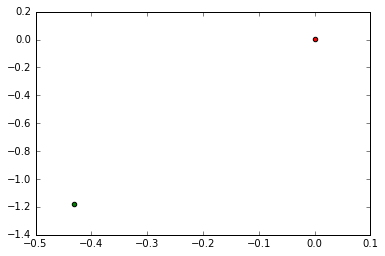

In [41]:
import solarsystem as ss
import math
import numpy as np

#Gravitational Constant
G=19.8695*10**(-30)

sol=ss.solar_system(max_time=1)

init_vel_sun=np.linalg.norm(sol.system[0].vel)
init_vel_earth=np.linalg.norm(sol.system[1].vel)

init_ke= .5*sol.system[1].mass*init_vel_earth**2+.5*sol.system[0].mass*init_vel_sun**2
init_pe= -G*sol.system[1].mass*sol.system[0].mass*(abs(np.linalg.norm(sol.system[1].pos)-np.linalg.norm(sol.system[0].pos)))
init_e=init_ke+init_pe

sol.run()

fin_vel_sun=np.linalg.norm(sol.system[0].vel)
fin_vel_earth=np.linalg.norm(sol.system[1].vel)

fin_pe=-G*sol.system[1].mass*sol.system[0].mass*(abs(np.linalg.norm(sol.system[1].pos)-np.linalg.norm(sol.system[0].pos)))
fin_ke= .5*sol.system[1].mass*fin_vel_earth**2+.5*sol.system[0].mass*fin_vel_sun**2
fin_e=fin_ke+fin_pe

color=['r','g','b']

for i in range(len(sol.system)):
    
    plt.scatter(sol.system[i].pos[0],sol.system[i].pos[1],c=color[i])

pd= (abs(fin_e-init_e)/init_e)*100

print()
print(init_e)
print(fin_e)
print(pd)

As we can see there is a 25% difference in the final and initial potential energy. In addition to this the final position for the planet is off. The default step size is 1/365 year and the max time is 1 year. This should come close to representing our own planet's orbit over the course of one year. Perhaps increasing the step size will make our outcome more accurate. In this next section I will test the effects of time step size on the percent difference in the potential energy.

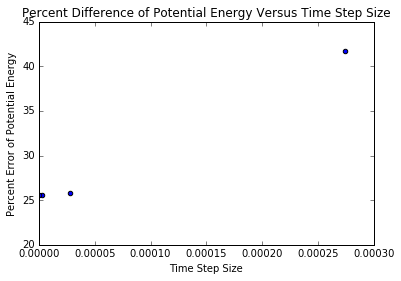

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd_pe=[]
time_step=[]

for i in [10,100,1000,10000]:
    
    time_step.append((1/(i*365)))
    step_test=ss.solar_system(step_size=(1/i))
    init_pe= -G*step_test.system[1].mass*step_test.system[0].mass*\
    (abs(np.linalg.norm(step_test.system[1].pos)-np.linalg.norm(step_test.system[0].pos)))
    
    step_test.run(p=False)
    fin_pe= -G*step_test.system[1].mass*step_test.system[0].mass*\
    (abs(np.linalg.norm(step_test.system[1].pos)-np.linalg.norm(step_test.system[0].pos)))
    
    pd=(abs(fin_pe-init_pe)/abs(init_pe))*100
    pd_pe.append(pd)
    
    
plt.scatter(time_step,pd_pe)
plt.axis([0,0.0003,20,45])
plt.title("Percent Difference of Potential Energy Versus Time Step Size")
plt.ylabel("Percent Error of Potential Energy")
plt.xlabel("Time Step Size")
plt.show()

In the above cell I show that this 

In this test we will show the difference between the 2 body and 3 body system where we add in Jupiter.

In [ ]:
sol=ss.solar_system(n_planets=2)

print("Earth Sun System \n")
sol.run()

print()
print("Earth Sun Jupiter Sytem \n")
sol_jupiter=ss.solar_system(n_planets=3)
sol_jupiter.run()

color=['r','g','b']

for i in range(len(sol.system)):
    
    plt.scatter(sol.system[i].pos[0],sol.system[i].pos[1],c=color[i])
    
plt.title("Earth Sun System")
plt.show()

for i in range(len(sol_jupiter.system)):
    
    plt.scatter(sol_jupiter.system[i].pos[0],sol_jupiter.system[i].pos[1],c=color[i])
    
plt.title("Earth Sun Jupiter System")
plt.show()

pd= abs(sol.system[1]-sol_jupiter.system[1])/(.5*(sol.system[1]+sol_jupiter.system[1]))

print("Percent Difference in Position: ",pd)

In this run the red dot is the Sun, the green dot is the Earth, and the blue dot is Jupiter.

The below function runs the 

Start
Sun: Position: [0 0 0], Velocity: [ 0.  0.  0.], Acceleration: [ 0.00187638  0.          0.        ]
Earth: Position: [1 0 0], Velocity: [ 0.        6.819943  0.      ], Acceleration: [-39.51937055   0.           0.        ]
Jupiter: Position: [ 5.203  0.     0.   ], Velocity: [ 0.          2.95985526  0.        ], Acceleration: [-1.45926999  0.          0.        ]
Mercury: Position: [ 0.39  0.    0.  ], Velocity: [  0.         10.9596484   0.       ], Acceleration: [-259.82895174    0.            0.        ]
Venus: Position: [ 0.723  0.     0.   ], Velocity: [ 0.          8.00661308  0.        ], Acceleration: [-75.60052322   0.           0.        ]
Mars: Position: [ 1.524  0.     0.   ], Velocity: [ 0.          5.46959429  0.        ], Acceleration: [-17.01339505   0.           0.        ]
Saturn: Position: [ 9.539  0.     0.   ], Velocity: [ 0.          2.20284159  0.        ], Acceleration: [-0.43631185  0.          0.        ]
Uranus: Position: [ 19.18   0.     0.  ], Velo

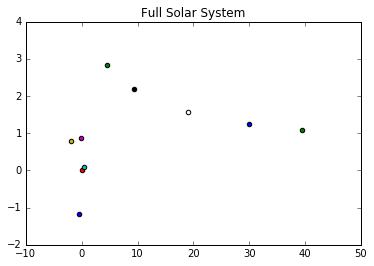

In [20]:
full_system=ss.solar_system(n_planets=10)
full_system.run()

color=['r','b','g','c','m','y','k','w','b','g']

for i in range(len(full_system.system)):
    
    plt.scatter(full_system.system[i].pos[0],full_system.system[i].pos[1],c=color[i])
    
plt.title("Full Solar System")
plt.show()